<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA015/blob/main/IAA015_Caixeiro_Viajante_GA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from random import randint, random
import random
import matplotlib.pyplot as plt
import math
import copy

#Criando as funções principais do Algorítmo Genético

## Criando as coordenadas das 100 cidades

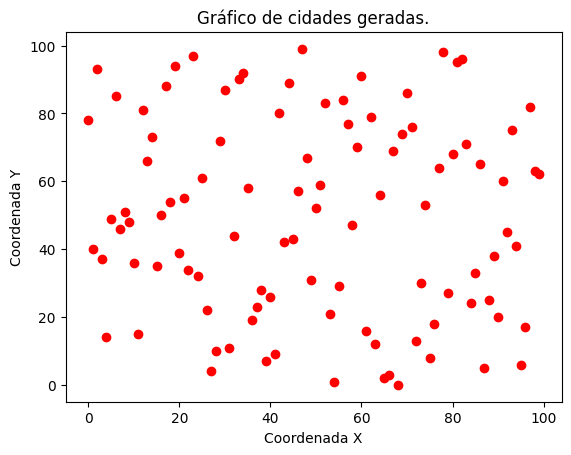

In [3]:
NRO_CIDADES = 100

x_points = list(range(NRO_CIDADES))
y_points = list(range(NRO_CIDADES))

random.shuffle(x_points)
random.shuffle(y_points)

plt.title("Gráfico de cidades geradas.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')
plt.show()

###População Inicial

In [4]:
def populacaoInicial(tamanho):
  percursos = []
  percurso = []
  for i in range(0, tamanho):
    cidades = list(range(0, NRO_CIDADES))
    listaCidades = cidades.copy()
    random.shuffle(listaCidades)
    for cidade in cidades:
      cidadePercurso = random.choice(listaCidades)
      listaCidades.remove(cidadePercurso)
      percurso.append(cidadePercurso)
    percursos.append(percurso)
    percurso = []
    cidades = []
  return percursos;

In [10]:
##DEBUG função População Inicial

percursos = populacaoInicial(2)

for percurso in percursos:
  print(percurso)


[84, 19, 64, 4, 50, 57, 77, 66, 72, 22, 5, 10, 7, 31, 81, 80, 9, 49, 67, 29, 18, 79, 46, 0, 3, 71, 95, 8, 25, 92, 36, 45, 44, 96, 76, 11, 43, 2, 20, 58, 16, 39, 51, 74, 85, 54, 89, 65, 34, 94, 78, 28, 75, 1, 12, 68, 82, 91, 73, 21, 23, 63, 38, 33, 53, 83, 26, 56, 52, 24, 48, 32, 27, 47, 14, 93, 42, 59, 70, 97, 41, 17, 40, 60, 62, 86, 90, 99, 35, 98, 55, 61, 6, 87, 15, 30, 69, 88, 37, 13]
[43, 42, 75, 78, 58, 70, 34, 50, 60, 14, 92, 36, 64, 45, 97, 53, 55, 24, 9, 98, 51, 83, 12, 52, 25, 44, 57, 41, 86, 38, 47, 26, 19, 63, 65, 96, 79, 94, 40, 32, 33, 13, 5, 67, 62, 91, 17, 29, 18, 73, 28, 2, 85, 93, 30, 20, 74, 35, 61, 46, 4, 71, 0, 21, 1, 87, 49, 7, 82, 99, 95, 90, 80, 77, 66, 84, 16, 48, 3, 6, 76, 15, 11, 27, 31, 72, 89, 69, 59, 68, 54, 23, 88, 39, 22, 81, 10, 37, 56, 8]


In [17]:
print(x_points[percursos[0][0]],y_points[percursos[0][0]] )

33 90


###Verifica Elementos Duplicados

In [14]:
def has_duplicates(lst):
    n = max(set(lst), key=lst.count)
    return lst.count(n) > 1

In [18]:
##DEBUG função duplicados
listaDuplicados = [2, 1, 2, 5, 2]
print(has_duplicates(listaDuplicados))

listaSemDuplicados = [1, 2, 3, 4, 5]
print(has_duplicates(listaSemDuplicados))

True
False


###Função de Avaliação (fit)

In [19]:
##Calcular Distância Euclidiana
##distancia = sqrt(((x2 - x1) ^ 2) + ((y2 - y1) ^ 2));
def FuncaoDeAvaliacao(percursos):
  soma_distancia = np.zeros(len(percursos));
  for index, percurso in enumerate(percursos):
    for i, cidade in enumerate(percurso):
      if i < (len(percurso) - 1):
        soma_distancia[index] += math.sqrt((x_points[percurso[i + 1]] - x_points[percurso[i]])**2 + (y_points[percurso[i + 1]] - y_points[percurso[i]])**2);
      else:
        soma_distancia[index] += math.sqrt((x_points[percurso[i]] - x_points[percurso[0]])**2 + (y_points[percurso[i]] - y_points[percurso[0]])**2);
    if has_duplicates(percurso):
      soma_distancia[index] = 999999999
  return soma_distancia;


def FuncaoDeAvaliacaoV2(percurso):
  soma_distancia = 0
  for i, cidade in enumerate(percurso):
    if i < (len(percurso) - 1):
      soma_distancia += math.sqrt((x_points[percurso[i + 1]] - x_points[percurso[i]])**2 + (y_points[percurso[i + 1]] - y_points[percurso[i]])**2);
    else:
      soma_distancia += math.sqrt((x_points[percurso[i]] - x_points[percurso[0]])**2 + (y_points[percurso[i]] - y_points[percurso[0]])**2);
  if has_duplicates(percurso):
    soma_distancia = 999999999
  return soma_distancia;


In [20]:
##DEBUG Função de Avaliação

percursos = populacaoInicial(2)
print(percursos)
avaliacao = FuncaoDeAvaliacao(percursos)
print(avaliacao)

print(f'funcao v2 {FuncaoDeAvaliacaoV2(percursos[0])}')

[[68, 67, 81, 73, 18, 10, 98, 59, 36, 63, 38, 91, 74, 62, 80, 76, 11, 39, 45, 3, 25, 0, 96, 58, 37, 61, 53, 97, 17, 41, 48, 83, 50, 34, 82, 85, 87, 26, 88, 40, 33, 99, 84, 20, 8, 60, 46, 72, 32, 12, 21, 16, 44, 71, 9, 94, 31, 52, 65, 29, 4, 89, 69, 30, 7, 43, 92, 90, 47, 24, 14, 54, 56, 42, 1, 70, 13, 49, 75, 57, 78, 93, 6, 55, 66, 51, 15, 86, 77, 2, 35, 95, 22, 19, 27, 5, 23, 28, 64, 79], [81, 88, 12, 21, 33, 24, 7, 53, 4, 31, 85, 78, 19, 50, 28, 65, 3, 2, 87, 13, 23, 26, 9, 70, 32, 22, 92, 54, 67, 82, 46, 44, 60, 80, 39, 1, 83, 73, 79, 84, 10, 58, 66, 20, 72, 90, 18, 76, 15, 55, 45, 29, 37, 69, 57, 6, 41, 38, 27, 97, 49, 40, 42, 48, 43, 59, 11, 68, 0, 86, 63, 93, 5, 98, 75, 64, 51, 99, 62, 47, 8, 61, 96, 30, 71, 35, 25, 16, 95, 89, 36, 94, 34, 17, 91, 74, 77, 56, 52, 14]]
[5149.41757218 4896.17191697]
funcao v2 5149.417572179891


###Preserva Melhor da Geração

In [21]:
def preservaMelhor(geracao, novaGeracao):
  avaliacao = FuncaoDeAvaliacao(geracao)
  maior = 0
  for i in range(len(avaliacao)):
    if avaliacao[maior] > avaliacao[i]:
      maior = i
  #print(avaliacao[maior])
  novaGeracao.append(geracao[maior])


In [22]:
#Debug preservar melhor geraçao
novaGeracao = []
preservaMelhor(percursos, novaGeracao)
print(novaGeracao)

[[81, 88, 12, 21, 33, 24, 7, 53, 4, 31, 85, 78, 19, 50, 28, 65, 3, 2, 87, 13, 23, 26, 9, 70, 32, 22, 92, 54, 67, 82, 46, 44, 60, 80, 39, 1, 83, 73, 79, 84, 10, 58, 66, 20, 72, 90, 18, 76, 15, 55, 45, 29, 37, 69, 57, 6, 41, 38, 27, 97, 49, 40, 42, 48, 43, 59, 11, 68, 0, 86, 63, 93, 5, 98, 75, 64, 51, 99, 62, 47, 8, 61, 96, 30, 71, 35, 25, 16, 95, 89, 36, 94, 34, 17, 91, 74, 77, 56, 52, 14]]


##Cruzamento Genético

In [23]:
##TODO - Implementar cruzamento OX, para evitar repetição

def cruzamento(geracao, num, nova):
  while True:
    for i in range(0, num):
      indA = random.randrange(0,len(geracao))
      indB = indA;
      while indA==indB:
        indB = random.randrange(0,len(geracao))
      #print(f'cruzamento {indA} e {indB}')
      ponto1 = random.randrange(1,round((len(geracao[0]) - 1)))
      #print(f'ponto de corte {ponto1}')

      paiA = geracao[indA]
      paiB = geracao[indB]

      res1 = list(set(paiA[0:ponto1]) & set(paiB[ponto1:]))
      res2 = list(set(paiB[0:ponto1]) & set(paiA[ponto1:]))

      cromossomosA = paiA[0:ponto1]
      cromossomosB = paiB[ponto1:]
      for i in range(0, len(res1)):
        cromossomosB.remove(res1[i])
        cromossomosB.append(res2[i])

      filho1 = cromossomosA
      filho1.extend(cromossomosB)
      #print(f'filho1 {filho1} duplicado? {has_duplicates(filho1)}')
      nova.append(filho1)
    break





In [24]:
##DEBUG cuzamento
novaGeracao = []
geracao = populacaoInicial(5)
print(geracao)
#preservaMelhor(geracao, novaGeracao)
cruzamento(geracao, 4, novaGeracao)
print(geracao)
print(novaGeracao)

[[22, 7, 51, 78, 65, 86, 85, 99, 24, 55, 82, 76, 2, 70, 1, 30, 39, 68, 63, 32, 44, 38, 84, 18, 88, 52, 36, 72, 47, 10, 62, 54, 57, 13, 42, 75, 69, 59, 80, 79, 60, 83, 14, 0, 71, 40, 92, 43, 96, 74, 61, 27, 23, 29, 93, 37, 87, 3, 15, 21, 5, 49, 25, 26, 81, 56, 64, 46, 97, 28, 19, 95, 66, 45, 41, 9, 50, 77, 11, 16, 8, 12, 67, 4, 98, 34, 33, 94, 53, 91, 17, 6, 35, 58, 73, 31, 90, 89, 20, 48], [34, 31, 72, 70, 80, 51, 35, 61, 28, 8, 2, 19, 81, 87, 29, 3, 98, 83, 12, 85, 21, 88, 53, 99, 66, 6, 67, 30, 14, 4, 40, 1, 58, 13, 74, 56, 52, 64, 97, 95, 44, 73, 45, 32, 47, 10, 33, 41, 55, 9, 27, 25, 69, 77, 26, 96, 59, 78, 36, 5, 94, 92, 24, 17, 16, 75, 89, 49, 57, 48, 38, 46, 79, 91, 63, 11, 23, 20, 82, 15, 50, 43, 0, 37, 65, 68, 60, 93, 22, 76, 71, 54, 90, 18, 39, 84, 62, 7, 86, 42], [81, 80, 86, 43, 51, 42, 6, 21, 15, 83, 61, 87, 72, 22, 19, 41, 95, 76, 64, 99, 98, 18, 77, 67, 55, 91, 97, 79, 47, 66, 90, 49, 52, 73, 24, 31, 48, 16, 45, 75, 54, 9, 35, 85, 65, 44, 50, 57, 4, 88, 78, 59, 94, 68, 7

##Mutação

In [25]:
#TODO: Implementar verificação de avaliação antes de inserir o individuo que sofreu mutação na solução, incluir porcentagem para isso ocorrer

def mutacao(geracao, taxaMutacao):
  if randint(1,100) <= taxaMutacao:
    individuoMutacao = random.randrange(0,len(geracao))
    print(f'Realizando mutacao no Individuo:  {individuoMutacao}')
    gene_1 = random.randrange(0,len(geracao[0]))
    gene_2 = random.randrange(0,len(geracao[0]))
    while gene_1 == gene_2:
      gene_2 = random.randrange(0,len(geracao[0]))
    copiaGeracao = copy.deepcopy(geracao)
    temp = copiaGeracao[individuoMutacao][gene_1]
    copiaGeracao[individuoMutacao][gene_1] = copiaGeracao[individuoMutacao][gene_2]
    copiaGeracao[individuoMutacao][gene_2] = temp
    #print(f'Individuo a ser mutado:  {geracao[individuoMutacao]} //Resultado após mutação:  {copiaGeracao[individuoMutacao]}')
    avaliacaoCopia = FuncaoDeAvaliacaoV2(copiaGeracao[individuoMutacao])
    avaliacaoGeracao = FuncaoDeAvaliacaoV2(geracao[individuoMutacao])
    #print(f'Avaliação antes da mutação: {avaliacaoGeracao}')
    #print(f'Avaliação após a mutação: {avaliacaoCopia}')
    ##30% de chances de verificar se a mutação criou individuo melhor antes de executar a mutação
    if random.randrange(0,100) < 101: ##Forcando a sempre entrar aqui para testes
      print(f'Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...')
      if avaliacaoCopia < avaliacaoGeracao:
        print(f'Avaliação superior ao anterior, enviando para a mansão X')
        geracao[individuoMutacao] = copiaGeracao[individuoMutacao]
      else:
        print(f'Avaliação abaixo do anterior, tentando uma nova mutacao ...')
        mutacao(geracao,100)
    else:
      print(f'Mutação não considerou avaliação')
      geracao[individuoMutacao] = copiaGeracao[individuoMutacao]




In [26]:
#Teste Mutacao

geracao = populacaoInicial(100)
print(geracao)

for i in range(0,100):
  mutacao(geracao, 100)
print(geracao)

[[17, 12, 89, 28, 65, 15, 39, 33, 83, 54, 90, 13, 73, 60, 59, 51, 38, 68, 77, 3, 5, 22, 57, 99, 87, 23, 1, 16, 72, 20, 70, 62, 61, 58, 84, 35, 44, 46, 4, 71, 24, 49, 79, 75, 8, 88, 2, 7, 18, 11, 52, 41, 80, 45, 31, 98, 95, 97, 56, 36, 6, 92, 34, 81, 50, 69, 19, 67, 91, 94, 76, 29, 32, 66, 47, 27, 55, 63, 74, 48, 78, 0, 43, 53, 21, 40, 42, 26, 85, 30, 64, 93, 96, 82, 10, 25, 9, 14, 37, 86], [4, 82, 7, 78, 29, 84, 92, 55, 76, 52, 81, 37, 86, 45, 58, 34, 36, 59, 95, 93, 64, 5, 8, 28, 72, 83, 56, 97, 88, 40, 19, 35, 2, 11, 17, 33, 89, 31, 91, 48, 60, 74, 14, 41, 75, 38, 80, 63, 39, 61, 94, 46, 9, 21, 99, 71, 67, 18, 62, 49, 26, 43, 30, 87, 47, 66, 16, 65, 42, 73, 32, 96, 6, 90, 1, 15, 23, 85, 54, 44, 77, 50, 68, 3, 12, 79, 70, 51, 25, 53, 24, 57, 13, 10, 0, 98, 20, 22, 69, 27], [25, 76, 50, 84, 41, 83, 82, 71, 87, 26, 36, 3, 94, 6, 97, 49, 80, 39, 11, 35, 30, 75, 85, 68, 63, 45, 92, 89, 77, 60, 69, 18, 43, 54, 20, 56, 40, 13, 19, 12, 22, 38, 73, 33, 32, 55, 96, 59, 21, 66, 27, 7, 88, 53, 4

##Execução do Algoritmo Genético

Distância percorrida: 4841.328469732921


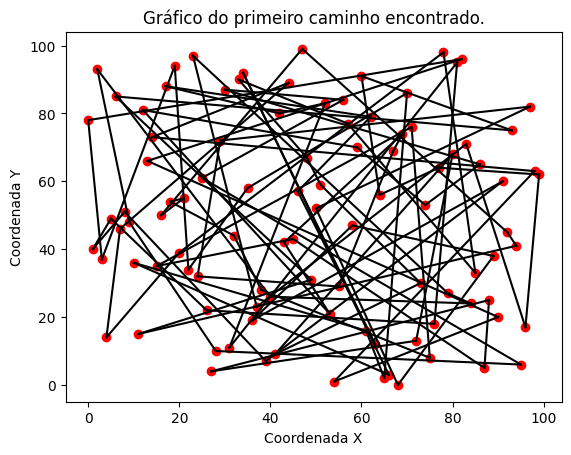

Geraçao 30000
Realizando mutacao no Individuo:  75
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova mutacao ...
Realizando mutacao no Individuo:  28
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação superior ao anterior, enviando para a mansão X
Realizando mutacao no Individuo:  72
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação superior ao anterior, enviando para a mansão X
Geraçao 29900
Geraçao 29800
Realizando mutacao no Individuo:  39
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova mutacao ...
Realizando mutacao no Individuo:  10
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova mutacao ...
Realizando mutacao no Individuo:  24
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova muta

In [29]:
#PRESETS AG
#------------------------------
numGeracoes = 30000
populacao = 100
taxaCruzamento = 90
taxaMutacao = 1
#------------------------------
p0 = populacaoInicial(populacao)
melhorPrimeiraGeracao = []
preservaMelhor(p0, melhorPrimeiraGeracao)
print(f'Distância percorrida: {FuncaoDeAvaliacaoV2(melhorPrimeiraGeracao[0])}')


plt.title("Gráfico do primeiro caminho encontrado.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

for i in range(0, len(melhorPrimeiraGeracao[0]) - 1):
  plt.plot([x_points[melhorPrimeiraGeracao[0][i]], x_points[melhorPrimeiraGeracao[0][i + 1]]], [y_points[melhorPrimeiraGeracao[0][i]], y_points[melhorPrimeiraGeracao[0][i + 1]]], 'k-')
  if i == (len(melhorPrimeiraGeracao[0]) - 2):
    plt.plot([x_points[melhorPrimeiraGeracao[0][i + 1]], x_points[melhorPrimeiraGeracao[0][0]]], [y_points[melhorPrimeiraGeracao[0][i + 1]], y_points[melhorPrimeiraGeracao[0][0]]], 'k-')
plt.show()

avaliacaoP0 = FuncaoDeAvaliacao(p0)

geracao = copy.deepcopy(p0)
while numGeracoes > 0:

  if numGeracoes % 100 == 0:
    print(f'Geraçao {numGeracoes}')

  novaGeracao = []
  mutacao(geracao, taxaMutacao)
  preservaMelhor(geracao, novaGeracao)
  cruzamento(geracao, taxaCruzamento, novaGeracao)
  numGeracoes = numGeracoes - 1
  avaliacaoNovaGeracao = FuncaoDeAvaliacao(novaGeracao)
  novaGeracao2 = sorted(zip(avaliacaoNovaGeracao, novaGeracao), reverse=True)
  geracao = [x for _, x in novaGeracao2]



geracao = novaGeracao.copy()
novaGeracao = []
preservaMelhor(geracao, novaGeracao)




Distância percorrida: 2146.996812888075
Duplicidade? False


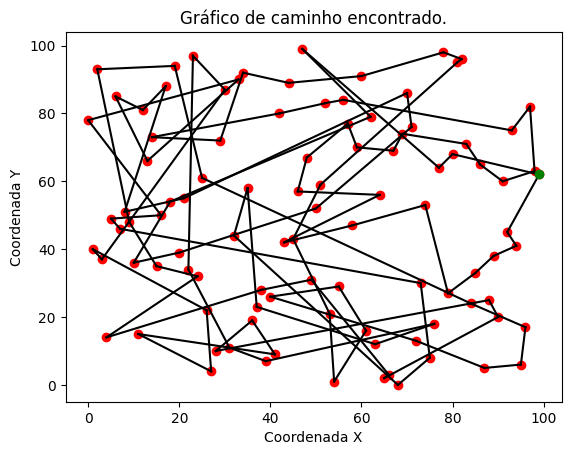

In [30]:
plt.title("Gráfico de caminho encontrado.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

print(f'Distância percorrida: {FuncaoDeAvaliacaoV2(novaGeracao[0])}')
print(f'Duplicidade? {has_duplicates(novaGeracao[0])}')

for i in range(0, len(novaGeracao[0]) - 1):
  plt.plot([x_points[novaGeracao[0][i]], x_points[novaGeracao[0][i + 1]]], [y_points[novaGeracao[0][i]], y_points[novaGeracao[0][i + 1]]], 'k-')
  if i == (len(novaGeracao[0]) - 2):
    plt.plot([x_points[novaGeracao[0][i + 1]], x_points[novaGeracao[0][0]]], [y_points[novaGeracao[0][i + 1]], y_points[novaGeracao[0][0]]], 'k-')

plt.plot(x_points[novaGeracao[0][0]], y_points[novaGeracao[0][0]], 'go')
plt.show()

Distância percorrida: 5106.62268799741
Duplicidade? False
Caminho percorrido: [75, 67, 10, 58, 49, 36, 63, 25, 50, 68, 48, 40, 74, 0, 46, 70, 66, 91, 37, 3, 64, 8, 17, 97, 32, 89, 28, 16, 78, 18, 96, 26, 92, 27, 35, 98, 59, 94, 62, 51, 33, 90, 52, 23, 82, 19, 88, 42, 71, 34, 12, 85, 87, 31, 65, 56, 86, 79, 55, 30, 80, 13, 21, 1, 5, 20, 45, 39, 84, 2, 54, 9, 77, 15, 22, 29, 11, 95, 72, 60, 83, 38, 61, 69, 44, 14, 47, 6, 81, 4, 93, 57, 7, 53, 76, 24, 99, 73, 41, 43]


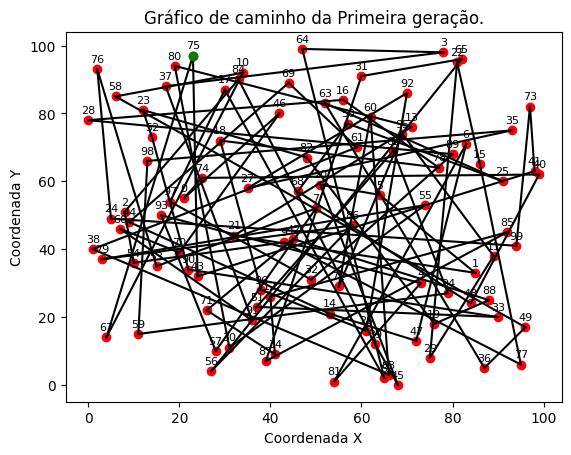

In [41]:

plt.title("Gráfico de caminho da Primeira geração.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

print(f'Distância percorrida: {FuncaoDeAvaliacaoV2(p0[0])}')
print(f'Duplicidade? {has_duplicates(p0[0])}')
print(f'Caminho percorrido: {p0[0]}')

for i in range(0, len(p0[0]) - 1):
    plt.plot([x_points[p0[0][i]], x_points[p0[0][i + 1]]], [y_points[p0[0][i]], y_points[p0[0][i + 1]]], 'k-')
    if i == (len(p0[0]) - 2):
        plt.plot([x_points[p0[0][i + 1]], x_points[p0[0][0]]], [y_points[p0[0][i + 1]], y_points[p0[0][0]]], 'k-')

plt.plot(x_points[p0[0][0]], y_points[p0[0][0]], 'go')

# Adicionando rótulos aos pontos
for i, valor in enumerate(p0[0]):
    plt.annotate(str(valor), (x_points[valor], y_points[valor]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.show()